## Modeling exercises 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pydataset import data

from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans

from importlib import reload

pd.options.display.float_format = '{:,.3f}'.format

In [34]:
# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [39]:
iris = sns.load_dataset('iris')

In [40]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa


* a - Choose features other than the ones used in the lesson.

In [41]:
X = iris[['sepal_length','petal_length']]

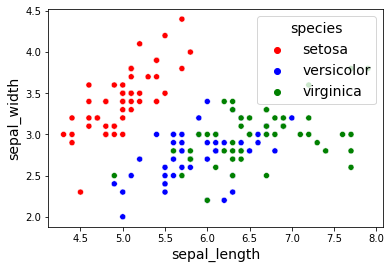

In [42]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species');

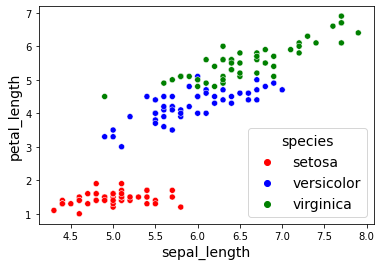

In [43]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species');

* b - Visualize the results of your clustering.

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
y = kmeans.fit_predict(X)
iris['cluster'] = y

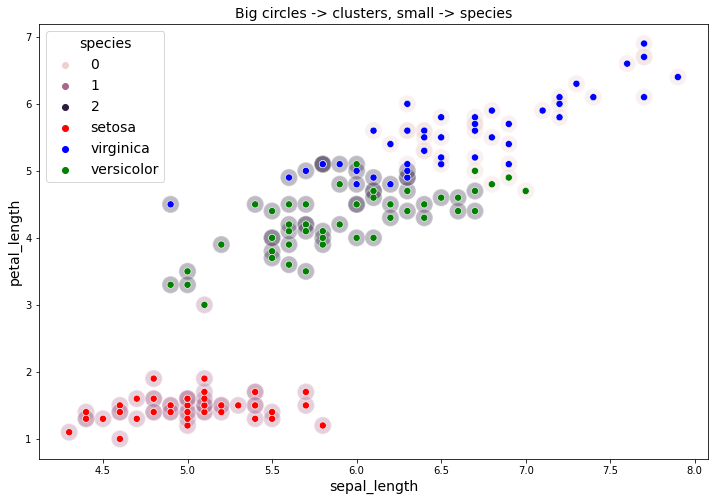

In [45]:
colors = ['red', 'blue', 'green']
palette = sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12, 8))
sns.scatterplot(y='petal_length', x='sepal_length', data=iris, hue=y, palette=palette, s=300, alpha=0.3)
sns.scatterplot(y='petal_length', x='sepal_length', data=iris, hue='species', hue_order=['setosa', 'virginica', 'versicolor'], palette=palette, s=50)
plt.title('Big circles -> clusters, small -> species')
plt.show()

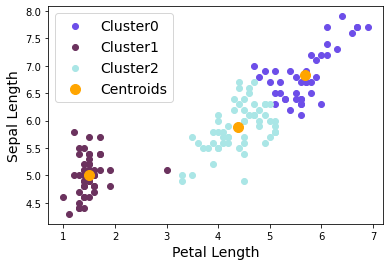

In [51]:
colors = ['#6d4ee9', '#6b325e', '#aae6e6', 'red', '#c7e7c9']
for i in range(3):
    #plt.scatter(X[X.cluster==i].petal_length, X[X.cluster==i].sepal_length, color=colors[i], label='Cluster'+str(i))
    plt.scatter(iris[iris.cluster==i].petal_length, iris[iris.cluster==i].sepal_length, color=colors[i], label='Cluster'+str(i))
    plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, color='orange', label = 'Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend();

* c - Use the elbow method to visually select a good value for k.

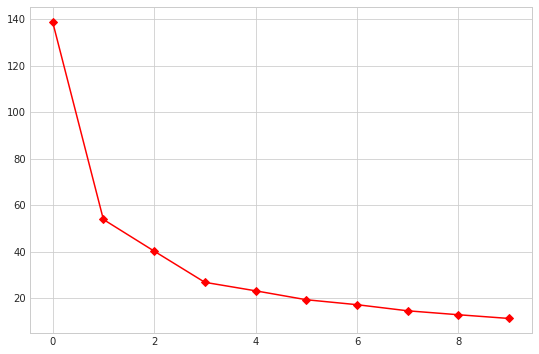

In [52]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series((KMeans(k).fit(X).inertia_ for k in range(2, 12))).plot(marker='D')

In [28]:
# optimal number of clusters is 3

* d - Repeat the clustering, this time with 3 different features.

In [29]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

In [53]:
X = iris [['sepal_length', 'sepal_width', 'petal_length']]

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
y = kmeans.fit_predict(X)

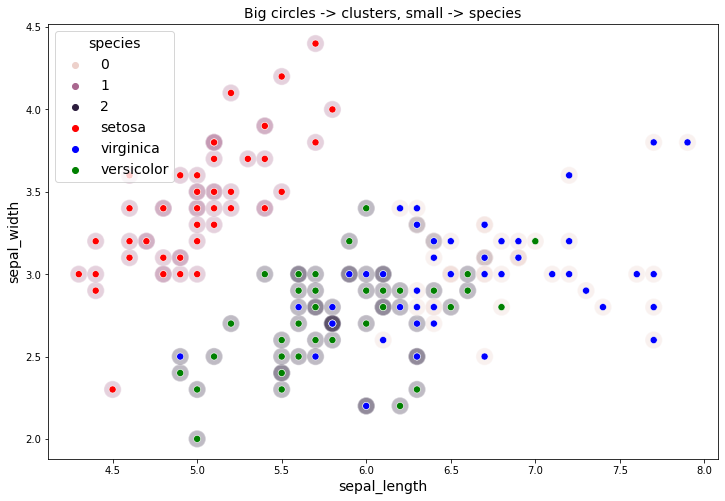

In [55]:
colors = ['red', 'blue', 'green']
palette = sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12, 8))
sns.scatterplot(y='sepal_width', x='sepal_length', data=iris, hue=y, palette=palette, s=300, alpha=0.3)
sns.scatterplot(y='sepal_width', x='sepal_length', data=iris, hue='species', hue_order=['setosa', 'virginica', 'versicolor'], palette=palette, s=50)
plt.title('Big circles -> clusters, small -> species')
plt.show()

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [33]:
import wrangle_mall as wm

In [57]:
mall = wm.acquire_mall_customers()

In [58]:
mall.shape

(200, 5)

In [59]:
mall.head(1)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39


In [102]:
X = mall[['age', 'annual_income']]

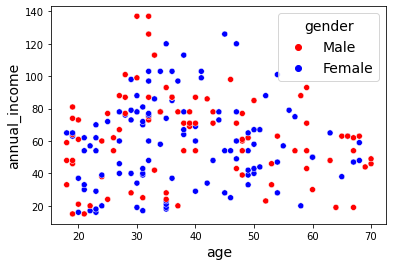

In [66]:
sns.scatterplot(x='age', y='annual_income', data=mall, hue='gender');

In [103]:
from sklearn.cluster import KMeans
wcss = [] #Within-Cluster Sum of Square
# run the loop with clusters from 1 to 10 to find the best n_clusters number
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

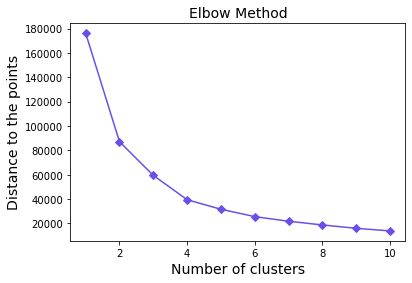

In [104]:
# plot wcss to find the 'elbow'
plt.plot(range(1, 11), wcss, color='#6d4ee9', marker='D')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance to the points')
plt.show()

In [105]:
kmeans = KMeans(n_clusters=4, random_state=42) #init='k-means++',
y_means = kmeans.fit_predict(X)

In [106]:
mall['cluster'] = y

In [107]:
X.columns

Index(['age', 'annual_income'], dtype='object')

<AxesSubplot:xlabel='age', ylabel='annual_income'>

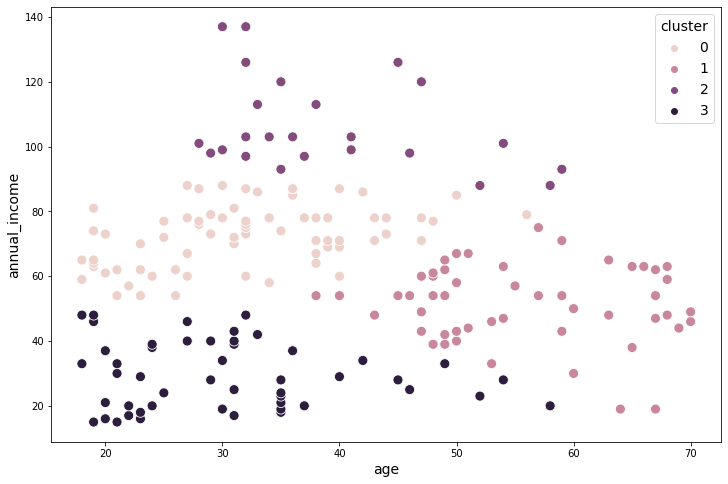

In [115]:
color = ['red', 'blue', 'green', 'magenta']
pal = sns.set_palette(sns.color_palette(color))
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='annual_income', data=mall, hue='cluster', palette=pal, s=100)

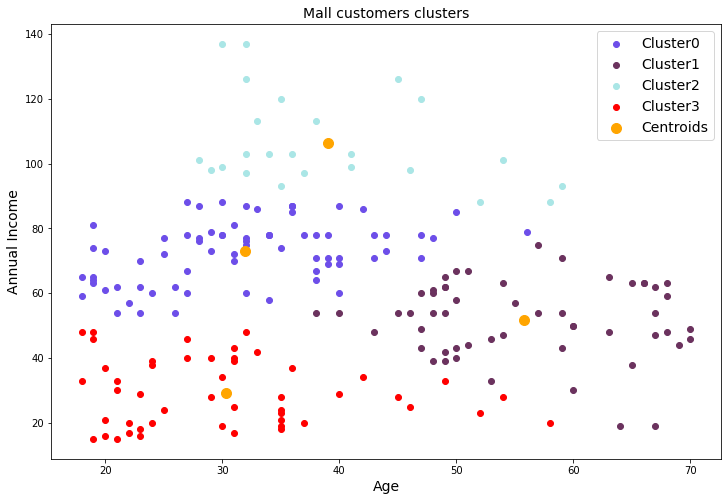

In [109]:
colors = ['#6d4ee9', '#6b325e', '#aae6e6', 'red', '#c7e7c9']
plt.figure(figsize=(12, 8))
for i in range(4):
    #plt.scatter(X[X.cluster==i].petal_length, X[X.cluster==i].sepal_length, color=colors[i], label='Cluster'+str(i))
    plt.scatter(mall[mall.cluster==i].age, mall[mall.cluster==i].annual_income, color=colors[i], label='Cluster'+str(i))
    plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='orange', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend();
plt.title('Mall customers clusters')
plt.show()

In [110]:
kmeans.cluster_centers_

array([[ 31.95890411,  72.95890411],
       [ 55.81481481,  51.77777778],
       [ 39.        , 106.5       ],
       [ 30.34693878,  29.26530612]])

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [111]:
X_scaled = mall[['age', 'annual_income']]

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_scaled)

In [116]:
kmeans = KMeans(n_clusters=4, random_state=42) #init='k-means++',
y_means = kmeans.fit_predict(X_scaled)

In [118]:
X_scaled = pd.DataFrame(X_scaled)

In [119]:
X_scaled['cluster'] = y_means

In [122]:
columns = ['age', 'annual_income', 'cluster']

In [123]:
X_scaled.columns = columns

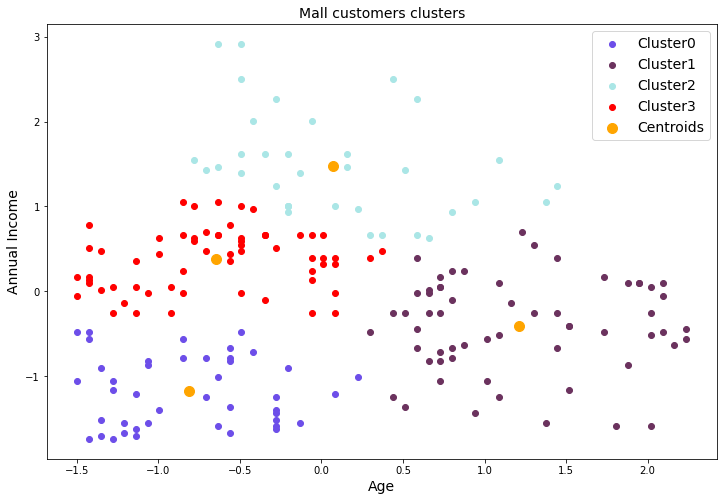

In [124]:
colors = ['#6d4ee9', '#6b325e', '#aae6e6', 'red', '#c7e7c9']
plt.figure(figsize=(12, 8))
for i in range(4):
    #plt.scatter(X[X.cluster==i].petal_length, X[X.cluster==i].sepal_length, color=colors[i], label='Cluster'+str(i))
    plt.scatter(X_scaled[X_scaled.cluster==i].age, X_scaled[X_scaled.cluster==i].annual_income, color=colors[i], label='Cluster'+str(i))
    plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='orange', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend();
plt.title('Mall customers clusters')
plt.show()

In [126]:
# other way to visualize

In [125]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,-0.814,-1.178
1,1.210,-0.406
2,0.070,1.474
3,-0.647,0.378


Text(0.5, 1.0, 'Visualizing Cluster Centers')

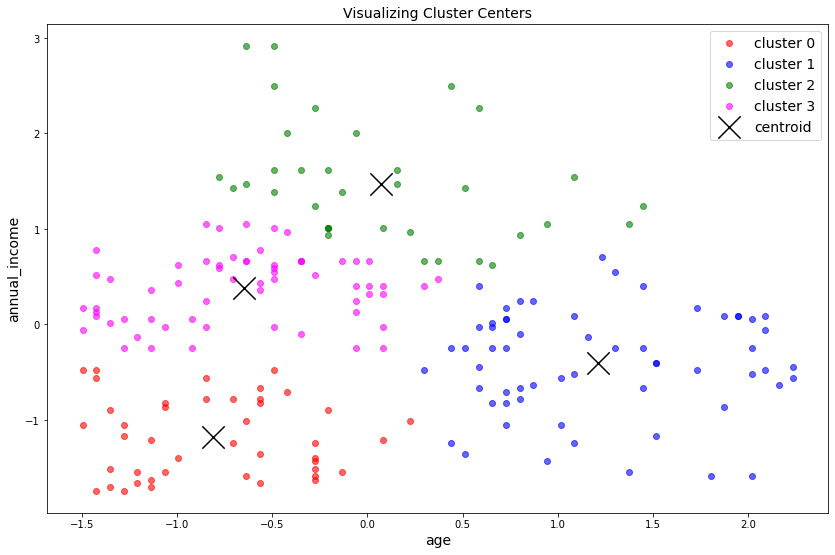

In [127]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(x='age', y='annual_income', c='black', marker='x', s=500, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')


#### Takeaways